<a href="https://colab.research.google.com/github/MoreJignesh/6-Months-Data-Science-Roadmap-/blob/main/Statistics_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Statistics Practical Implementation

##Measure of Central Tendancy

1. Mean
2. Median
3. Mode


In [1]:
import numpy as np
import statistics
import seaborn as sns

In [2]:
ages = [23,24,32,26,72,55,67,48,61,16,18,26,56,91,12,65,48,37,220]

In [3]:
print(np.mean(ages))
print(np.median(ages))

52.473684210526315
48.0


###Findings

From the above we can notice that there was an outlier within the data but we can notice it in the difference of Mean and median (feature engineering).
It's clear that the mean is significantly impacted by the outlier, whereas the median remains relatively stable.

In [4]:
ages2 = [23,24,32,26,72,55,67,48,61,16,18,26,56,91,12,65,48,37]

In [5]:
print(np.mean(ages2))
print(np.median(ages2))

43.166666666666664
42.5


In [6]:
print(statistics.mean(ages))
print(statistics.median(ages))

52.473684210526315
48


In [7]:
print(statistics.mode(ages))

26


##Let's check how to identify outliers


<Axes: >

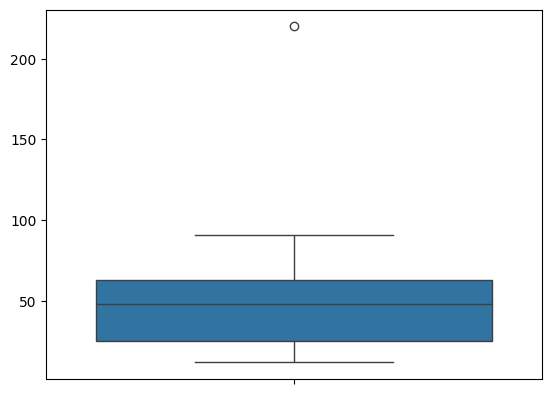

In [8]:
sns.boxplot(ages)

##Five Number Summary

In [9]:
q1, q3 = np.percentile(ages,[25,75])

print(q1,q3)

25.0 63.0


In [10]:
## to check outlier [Lower fence and Higher fence]

IQR = q3 - q1
lower_fence = q1 - 1.5*(IQR)
higher_fence = q3 + 1.5*(IQR)

print(lower_fence,higher_fence)

-32.0 120.0


### Findings
 Based on this we got the lower_fence and higher_fence, any number outside of this range is considered as outlier

#Measure of Dispersion

1. Variance
2. Standard Deviation

In [11]:
#Calculating Variance (sample (n-1))

statistics.variance(ages)

2129.2631578947367

In [12]:
# Calculating Population Variance
np.var(ages,axis = 0)

2017.1966759002771

In [13]:
#cross confirming variance (population = 0 , sample = 1)

def variance(data,dof = 1):
  n = len(ages)

  #mean of the data

  mean = sum (data)/n

  #variance
  deviation = [(x - mean) ** 2 for x in data]
  variance = sum(deviation)/(n - dof)

  return variance



In [14]:
variance(ages,dof = 0)

2017.1966759002771

In [15]:
variance(ages,dof = 1)

2129.263157894737

In [16]:
statistics.pvariance(ages)

2017.1966759002771

In [17]:
import math
std = math.sqrt(statistics.pvariance(ages))

print(std)

44.91321270962786


#Histogram and PDF (frequency)

<Axes: ylabel='Count'>

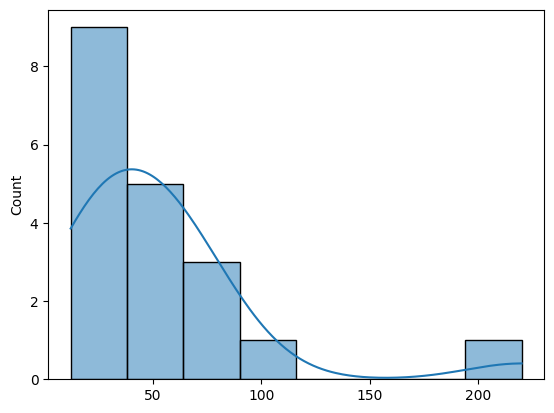

In [18]:
#kde = kernel density estimate

sns.histplot(ages,kde = True)

CHeck how to identify the outliers in our dataset

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
##Defining our dataset

dataset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,12,10,14,13,15,10]

(array([29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

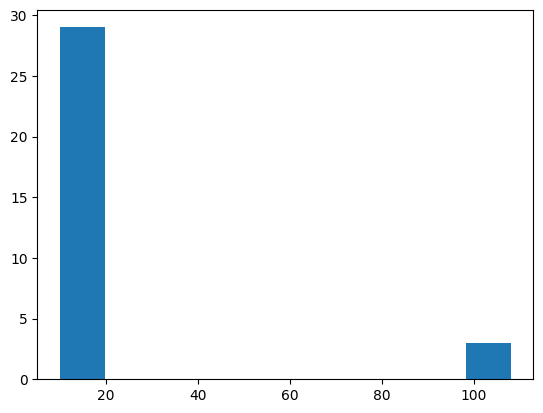

In [21]:
##this way you can notice the outliers, however not the most accurate way.
plt.hist(dataset)

In [22]:
#dectecting outliers using Z_score
def detect_outliers(data):
  outliers = []
  threshold = 3 #3rd standard deviation
  mean = np.mean(data)
  std = np.std(data)

  for i in data:
    z_score = (i-mean)/std
    if np.abs(z_score)>threshold:
      outliers.append(i)
  return outliers


In [23]:
detect_outliers(dataset)

[107, 108]

IOQ Technique (most accurate way)
  1. Sort the data
  2. Calculate Q1 (25%) and Q3(75%)
  3. IQR (Q3-Q1)
  4. Find the lower fence (Q1-1.5(IQR))
  5. Find the lower fence (Q3+1.5(IQR))


In [24]:
#sorting data in assending order and calculating the necessary fields
dataset = sorted(dataset)
q1, q3 = np.percentile(dataset,[25,75])
iqr = q3 - q1

print(dataset,q1,q3,iqr)

[10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 17, 19, 102, 107, 108] 12.0 15.0 3.0


In [25]:
#calculating lower and upper fence
lower_fence = q1-1.5*iqr
upper_fence = q3+1.5*iqr

print(lower_fence, upper_fence)

7.5 19.5


<Axes: >

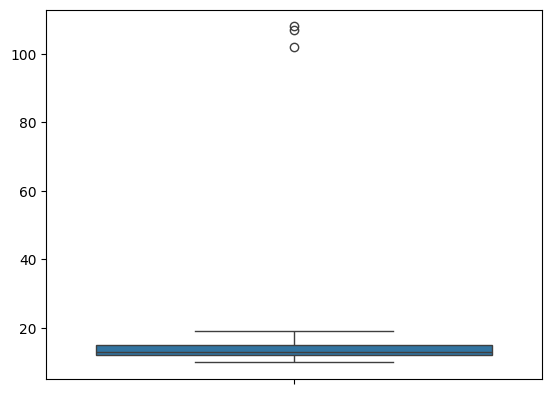

In [26]:
sns.boxplot(dataset)

As you can notice the IQR way was most accrate way of identifying the outliers, were it has provided us 3 outliers and previous one was not the accurate because it has just provided 2 of them instead of 3.